In [1]:
datadirectory = "/Users/alan/Downloads/frida/20251023/"

In [2]:
import sys
sys.path.append(".")
import h2rg

In [3]:
import glob
import astropy.io
import astropy.stats
import numpy as np
import matplotlib.pyplot as plt

In [4]:
readnoiselist = []


def readnoise(
    filepath0, filepath1, xslice=slice(4, 2044), yslice=slice(4, 2044), verbose=False
):
    hdu0 = astropy.io.fits.open(filepath0)[0]
    header0, data0 = hdu0.header, hdu0.data.astype(np.float32)
    hdu1 = astropy.io.fits.open(filepath1)[0]
    header1, data1 = hdu1.header, hdu1.data.astype(np.float32)
    data0[np.where(data0 == 0)] = np.nan
    data1[np.where(data1 == 0)] = np.nan
    data = data1 - data0
    data = h2rg.channelcorrection(data, order=1)
    readnoise = astropy.stats.mad_std(data[yslice, xslice], ignore_nan=True) / np.sqrt(
        2.0
    )
    if verbose:
        print("%5.2f %s  %s" % (readnoise, filepath0, filepath1))
    readnoiselist.append(readnoise)


filepathlist = sorted(glob.glob(datadirectory + "*.fits"))[:]
for filepath0, filepath1 in zip(filepathlist[4::2], filepathlist[5::2]):
    readnoise(filepath0, filepath1, verbose=True)

print(
    "%.2f %.2f %.2f"
    % (np.nanmedian(readnoiselist), np.nanmean(readnoiselist), np.nanstd(readnoiselist))
)



 9.27 /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_05.545_00005.fits  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_07.021_00006.fits
 9.25 /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_08.497_00007.fits  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_09.973_00008.fits
 9.31 /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_11.449_00009.fits  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_12.925_00010.fits
 9.47 /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_14.401_00011.fits  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_15.877_00012.fits
 9.31 /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_17.353_00013.fits  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_18.829_00014.fits
 9.30 /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_20.305_00015.fits  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_21.781_00016.fits
 9.48 /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_23.257_00017.fits  /U

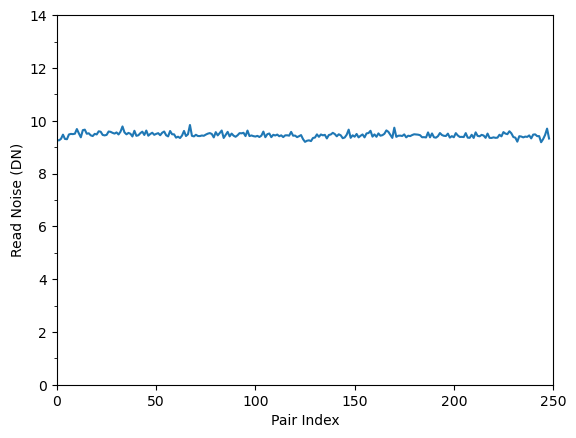

In [5]:
i = range(0, len(readnoiselist))
plt.plot(i, readnoiselist)
plt.xlabel("Pair Index")
plt.ylim(0,14)
plt.xlim(0,250)
plt.ylabel("Read Noise (DN)")
plt.yticks(np.arange(0,15,2))
plt.yticks(np.arange(0,15,1), minor=1)
plt.savefig("readnoise-time.png")
plt.show()


In [6]:
datalist = []

def readnoiselist(filepath0, filepath1, xslice=slice(4,2044), yslice=slice(4,2044), verbose=False):
    hdu0 = astropy.io.fits.open(filepath0)[0]
    header0, data0 = hdu0.header, hdu0.data.astype(np.float32)
    hdu1 = astropy.io.fits.open(filepath1)[0]
    header1, data1 = hdu1.header, hdu1.data.astype(np.float32)
    data0[np.where(data0==0)] = np.nan
    data1[np.where(data1==0)] = np.nan
    data = data1 - data0
    data = h2rg.channelcorrection(data, order=1)
    readnoise = astropy.stats.mad_std(data[yslice,xslice], ignore_nan=True) / np.sqrt(2.0)
    if verbose:
        print("%5.2f  %s  %s" % (readnoise, filepath0, filepath1))
    global datalist
    datalist.append(data[yslice,xslice] / np.sqrt(2))

filepathlist = sorted(glob.glob(datadirectory + "*.fits"))[:]
for filepath0, filepath1 in zip(filepathlist[4::2],filepathlist[5::2]):
    readnoiselist(filepath0, filepath1, verbose=True)

print(len(datalist))
readnoiseimage = astropy.stats.mad_std(datalist, axis=0)

print("%.2f %.2f %.2f" % (np.nanmedian(readnoiseimage), np.nanmean(readnoiseimage), np.nanstd(readnoiseimage)))

 9.27  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_05.545_00005.fits  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_07.021_00006.fits
 9.25  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_08.497_00007.fits  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_09.973_00008.fits
 9.31  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_11.449_00009.fits  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_12.925_00010.fits
 9.47  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_14.401_00011.fits  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_15.877_00012.fits
 9.31  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_17.353_00013.fits  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_18.829_00014.fits
 9.30  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_20.305_00015.fits  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_21.781_00016.fits
 9.48  /Users/alan/Downloads/frida/20251023/H2RG_Oct-23-20_08_23.257_00017.f

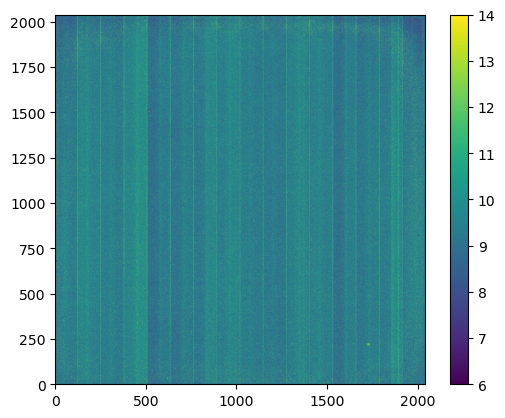

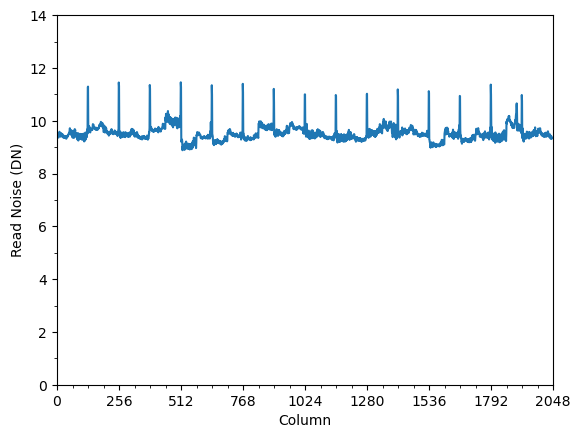

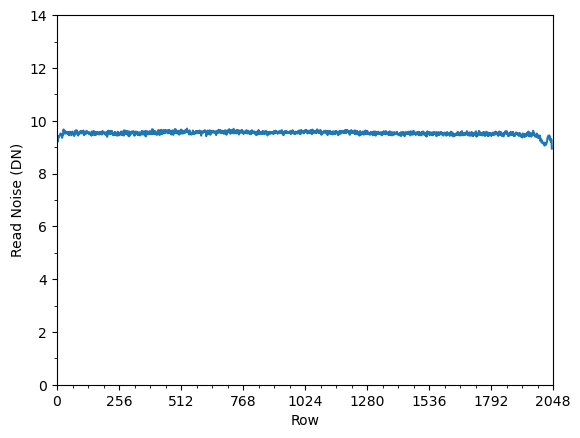

In [11]:
plt.imshow(readnoiseimage, origin="lower", vmin=6, vmax=14)
plt.colorbar()
plt.savefig("readnoise-image.png")
plt.show()

readnoisey = np.nanmean(readnoiseimage,axis=1)
readnoisex = np.nanmean(readnoiseimage,axis=0)
iy = np.arange(0,readnoiseimage.shape[0])+4
ix = np.arange(0,readnoiseimage.shape[1])+4

plt.plot(ix, readnoisex)
plt.xlabel("Column")
plt.ylim(0,14)
plt.xlim(0,2048)
plt.ylabel("Read Noise (DN)")
plt.xticks(np.arange(0,2049,256))
plt.xticks(np.arange(0,2049,64), minor=1)
plt.yticks(np.arange(0,15,2))
plt.yticks(np.arange(0,15,1), minor=1)
plt.savefig("readnoise-columns.png")
plt.show()

plt.plot(iy, readnoisey)
plt.xlabel("Row")
plt.ylim(0,14)
plt.xlim(0,2048)
plt.ylabel("Read Noise (DN)")
plt.xticks(np.arange(0,2049,256))
plt.xticks(np.arange(0,2049,64), minor=1)
plt.yticks(np.arange(0,15,2))
plt.yticks(np.arange(0,15,1), minor=1)
plt.savefig("readnoise-rows.png")
plt.show()
